# License

BSD 3-Clause License

Copyright (c) 2024, Pranjal Choudhury

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.



# Instructions

This notebook is used to prepare training datasets from ThunderSTORM synthetic datasets.
1. Go to ThunderSTORM > Performance testing > Generator of simulated data
2. do the camera setup as per your settings
3. Set up the simulation paramaters. I have attached my parameters underneath
4. Save the simulated image stack as 'training_images.tif' and the CSV of the localizations as 'training_dataset.csv' in the directory 'data'
5. Run the code below to create output images for the training images from the CSV file.
6. save the output images as 'heatmaps.tif' in the directory 'data'

My ThunderSTORM simulation parameters:
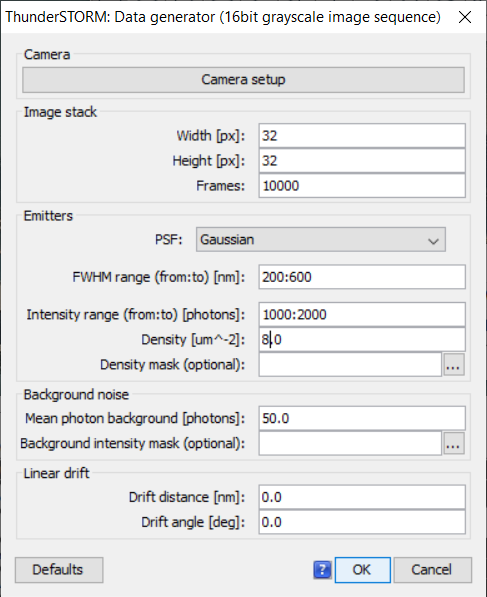

7. If you want, similarly create validation sets using ThunderSTORM with names 'validation_input.tif' and process the corresopnding CSV using this program to create 'validation_output.tif' in the directory 'data'

## import the dpenencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import os

make a directory named 'training_data'

In [2]:
os.makedirs('./training_data', exist_ok=True)

## load the training csv file generated by ThunderSTORM

In [2]:
dataframe = pd.read_csv('training_data/training_dataset.csv')

## load the training images generated by ThunderSTORM

In [ ]:
images = io.imread('training_data/training_density_4.tif')
io.imshow(images[0])

## run the cells below

In [ ]:
nframes, width, height = images.shape

In [22]:
df = pd.DataFrame()
df['frame'] = dataframe['frame'].astype('int')
df['x_pos'] = round(dataframe['x [nm]']/100, 2)
df['y_pos'] = round(dataframe['y [nm]']/100, 2)


In [40]:
# prepare a 2D gaussian 
def gaussian(size,x0,y0,sigma):
    x= np.linspace(0,size, size)
    X,Y = np.meshgrid(x,x)
    g = np.exp(-((X-x0)*(X-x0)+(Y-y0)*(Y-y0))/(2*sigma*sigma))
    return g



In [44]:
patches = np.zeros((nframes, width*4, height*4))
# Group the DataFrame by 'frame' column
grouped = df.groupby('frame')

# Iterate over each group
for frame, group in grouped:
    # Iterate over each row in the group
    for index, row in group.iterrows():
        # Compute the Gaussian for the current row
        x_pos, y_pos = row['x_pos']*4, row['y_pos']*4
        g = gaussian(128, x_pos, y_pos, sigma=1)
        
        # Add the Gaussian to the patches array at the corresponding position
        patches[frame - 1] += g

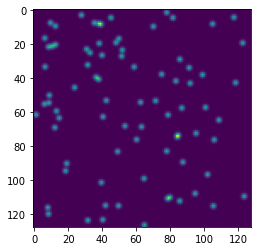

In [45]:
plt.imshow(patches[0])

In [48]:
io.imsave('training_data/training_density_4_heatmaps.tif', patches)

In [ ]:
fig , ax = plt.subplots(1,2)
ax[0].imshow(images[0])
ax[1].imshow(patches[0])
plt.show()